# Classifier: Support Vector Machine (SVM)

In [1]:
# Import Python Libraries
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn import datasets
from sklearn.svm import SVC

### Load & Inspect Cleaned Data

In [2]:
# Read cleaned data into pandas & create dataframe
df = pd.read_csv(os.path.join(".", "Cleaned_Data", "chromatic.csv"))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,Latitude,Longitude,Country,Region,Sub_Region
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-15.75,-47.95,Brazil,South America,South America
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,14.91,-23.51,Cabo Verde,Africa,Western Africa
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,12.65,-8.00,Mali,Africa,Western Africa
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,9.03,38.74,Ethiopia,Africa,Eastern Africa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,34.03,-6.85,Morocco,Africa,Northern Africa


In [3]:
# Determine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Columns: 121 entries, 0 to Sub_Region
dtypes: float64(118), object(3)
memory usage: 1001.2+ KB


In [4]:
# Drop all columns except inputs and desired output column
dropped_column_list = ['Latitude', 'Longitude', 'Country', 'Region']
df.drop(dropped_column_list, axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,Sub_Region
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,South America
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,Western Africa
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,Western Africa
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,Eastern Africa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,Northern Africa


In [5]:
# Count number of unique entries in target column (this will be our y variable)
df['Sub_Region'].nunique()

15

In [6]:
# Determine number of entries per unique entry in target column
df['Sub_Region'].value_counts()

Southern Asia                139
Western Africa               124
Southern Europe              118
Northern Africa               99
Western Asia                  93
South-eastern Asia            91
Eastern Asia                  84
Eastern Africa                82
Northern Europe               65
Central Asia                  62
South America                 36
Caribbean                     22
Eastern Europe                19
Australia and New Zealand     14
Central America               11
Name: Sub_Region, dtype: int64

### Pre-processing

In [7]:
# Define X and y
data = df.values
X = data[:, 0:115]

y = df['Sub_Region']
y.value_counts()

Southern Asia                139
Western Africa               124
Southern Europe              118
Northern Africa               99
Western Asia                  93
South-eastern Asia            91
Eastern Asia                  84
Eastern Africa                82
Northern Europe               65
Central Asia                  62
South America                 36
Caribbean                     22
Eastern Europe                19
Australia and New Zealand     14
Central America               11
Name: Sub_Region, dtype: int64

### Label Encode Data

In [8]:
# Label-encode data set:  Label Encoding converts a non-numeric column of categorical text data into numeric form in
# order to convert it into machine-readable numerical data.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(encoded_y)

[ 9 13 13 ... 12  8  8]


###  Create a Train Test Split

In [9]:
# NOTE: Random state ensures that the splits that we generate are reproducible.Scikit-learn uses random permutations to 
# generate the splits.The random state that you provide is used as a seed to the random number generator. This ensures
# that the random numbers are generated in the same order.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Inspect the Shape of the Data

In [10]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (794, 115)
y_train Shape: (794,)
X_test Shape: (265, 115)
y_test Shape: (265,)


### Train the Data

In [11]:
# Train the model - EXISTING CODE

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Code to Improve Future Outcome

### *Scale the Data*

In [12]:
# Scale the data using the MinMaxScaler and perform some feature selection *FUTURE CODE*

# WHAT:
# MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. 
# Use this as the first scaler choice to transform a feature because it will preserve the shape of the dataset (no 
# distortion).

# WHEN:
# Normalization across instances should be done after splitting the data between training and test set, using only the
# data from the training set. This is because the test set plays the role of fresh unseen data, so it's not supposed to 
# be accessible at the training stage. Source: datascience.stackexchange.com

from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [13]:
print('X_train Scaled Shape:', X_train_scaled.shape)
print('X_test Scaled Shape:', X_test_scaled.shape)

X_train Scaled Shape: (794, 115)
X_test Scaled Shape: (265, 115)


In [14]:
# Train the model - *FUTURE CODE*

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
# Determine Training & Testing Accuracy of the Model *FUTURE CODE*

# The train accuracy is the accuracy of a model on examples it was constructed on.
# The test accuracy is the accuracy of a model on examples it hasn't seen.

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6120906801007556
Testing Data Score: 0.43018867924528303


### *Code to Improve the Future Outcome: Hyperparameter Tuning*

In [16]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.453, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.497, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.415, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.409, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.437, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.453, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.497, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.415, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.409, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.4s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.44583233818963464


###  Save the Model

In [19]:
# Joblib is a set of tools to provide lightweight pipelining in Python. In particular: transparent disk-caching of 
# functions and lazy re-evaluation (memoize pattern) easy simple parallel computing. Joblib is optimized to be fast and
# robust in particular on large data and has specific optimizations for numpy arrays. Source: measurespace.medium.com

# Save the model using joblib
import joblib
model = 'SVM.sav'
joblib.dump(model, 'SVM.sav') 

['SVM.sav']

# RESUME HERE FOR CURRENT EXAMPLE

### Support Vector Machine (SVM) Linear Classification

In [20]:
# SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and 
# non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line
# or a hyperplane which separates the data into classes.

In [21]:
# Import Support Vector Machine (SVM) linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.411


In [23]:
# Calculate & print classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                           precision    recall  f1-score   support

Australia and New Zealand       0.67      0.50      0.57         4
                Caribbean       0.67      0.86      0.75         7
          Central America       1.00      0.67      0.80         3
             Central Asia       0.32      0.41      0.36        17
           Eastern Africa       0.40      0.50      0.44        16
             Eastern Asia       0.35      0.33      0.34        24
           Eastern Europe       0.75      0.60      0.67         5
          Northern Africa       0.23      0.35      0.28        23
          Northern Europe       0.52      0.80      0.63        15
            South America       0.17      0.29      0.21         7
       South-eastern Asia       0.37      0.50      0.42        14
            Southern Asia       0.54      0.33      0.41        45
          Southern Europe       0.50      0.33      0.40        30
           Western Africa       0.30      0.28      0.29     

### Linearly Separable Data with Support Vectors

In [24]:
from sklearn import svm

In [25]:
# Create a SVM classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [26]:
# Train the model using the training sets
clf = clf.fit(X_train, y_train)

In [27]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

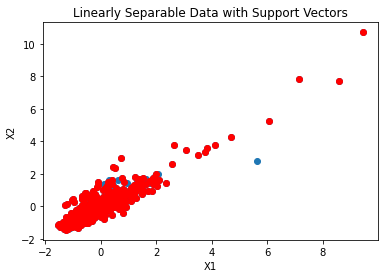

In [28]:
# Support Vector Machine (SVM) constructs a hyperplane that aims to separate between classes the dataset by maximizing
# the margin using support vectors.

# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly Separable Data with Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('./images/Chromatc Sub-Region - Linearly Separable Data with Support Vectors.png')
plt.show()

# Code to Improve Future Outcome

### *Cross Validation: Prediction Error Plot for Regression Model Evaluation*

In [29]:
# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. We can diagnose the regression models using this 
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

C:\Users\colle\anaconda3\envs\PythonML\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


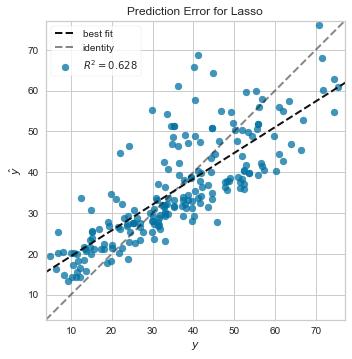

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
#visualizer.show(outpath='./images/Chromatc Sub-Region - Prediction Error.png')